# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as json
import csv as csv
from sklearn import datasets
from scipy.stats import linregress
from datetime import datetime
import time

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
#CHANGE BACK TO 1500 FOR SIZE ON BOTH.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Base URL and units.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
      

In [4]:
#Print a single jason request to see the structure of the data.

trialresponse = requests.get(query_url+"Canberra").json()
print(json.dumps(trialresponse, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -35.2835,
        "lon": 149.1281
    },
    "dt": 1647658167,
    "id": 2172517,
    "main": {
        "feels_like": 22,
        "humidity": 62,
        "pressure": 1022,
        "temp": 22.11,
        "temp_max": 23.48,
        "temp_min": 20.3
    },
    "name": "Canberra",
    "sys": {
        "country": "AU",
        "id": 9588,
        "sunrise": 1647633916,
        "sunset": 1647677856,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 3.09
    }
}


In [5]:
#Create a set of lists to house the weather data provided by the website:
    
list_city_name=[]
list_city_id=[]
list_country=[]
list_longitude=[]
list_latitude=[]
list_weather_desciption=[]
list_temp=[]
list_feels_like=[]
list_min_temp=[]
list_max_temp=[]
list_pressure=[]
list_humidity=[]
list_visibility=[]
list_wind_speed=[]
list_wind_temp=[]
list_sunrise=[]
list_sunset=[]
list_cloudiness=[]

# Create a value to append to lists when City Data is unavailable.
# Failure to append the lists might mean that some are longer than others.
# That kind of asymmetry means that a master data frame cannot be created.

No_City_Data_Input="No Data"

In [6]:
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name=response["name"]
        list_city_name.append(city_name)
        
        city_id=response["id"]
        list_city_id.append(city_id)
        
        print("City Name:   " + (str(city_name)) + "  (City ID: " + (str(city_id)) + ")")
        
        country=response["sys"]["country"]
        list_country.append(country)
        
        longitude=response["coord"]["lon"]
        list_longitude.append(longitude)
        
        latitude=response["coord"]["lat"]
        list_latitude.append(latitude)
        
        temp=response["main"]["temp"]
        list_temp.append(temp)
        
        feels_like=response["main"]["feels_like"]
        list_feels_like.append(feels_like)
        
        min_temp=response["main"]["temp_min"]
        list_min_temp.append(min_temp)
        
        max_temp=response["main"]["temp_max"]
        list_max_temp.append(max_temp)
        
        pressure=response["main"]["pressure"]
        list_pressure.append(pressure)
        
        humidity=response["main"]["humidity"]
        list_humidity.append(humidity)
        
        visibility=response["visibility"]
        list_visibility.append(visibility)
        
        wind_speed=response["wind"]["speed"]
        list_wind_speed.append(wind_speed)
        
        wind_temp=response["wind"]["deg"]
        list_wind_temp.append(wind_temp)
        
        sunrise=response["sys"]["sunrise"]
        list_sunrise.append(sunrise)
        
        sunset=response["sys"]["sunset"]
        list_sunset.append(sunset)
        
        cloudiness=response["clouds"]["all"]
        list_cloudiness.append(cloudiness)
        
    except KeyError:
        print("---City Data Not Found---")
        list_city_name.append(No_City_Data_Input)
        list_city_id.append(No_City_Data_Input)
        list_country.append(No_City_Data_Input)
        list_longitude.append(No_City_Data_Input)
        list_latitude.append(No_City_Data_Input)
        list_temp.append(No_City_Data_Input)
        list_feels_like.append(No_City_Data_Input)
        list_min_temp.append(No_City_Data_Input)
        list_max_temp.append(No_City_Data_Input)
        list_pressure.append(No_City_Data_Input)
        list_humidity.append(No_City_Data_Input)
        list_visibility.append(No_City_Data_Input)
        list_wind_speed.append(No_City_Data_Input)
        list_wind_temp.append(No_City_Data_Input)
        list_sunrise.append(No_City_Data_Input)
        list_sunset.append(No_City_Data_Input)
        list_cloudiness.append(No_City_Data_Input)
    

City Name:   Ushuaia  (City ID: 3833367)
City Name:   Avarua  (City ID: 4035715)
City Name:   Longyearbyen  (City ID: 2729907)
---City Data Not Found---
City Name:   Voh  (City ID: 2137748)
City Name:   Phibun Mangsahan  (City ID: 1607730)
City Name:   Cape Town  (City ID: 3369157)
City Name:   Dudinka  (City ID: 1507116)
City Name:   Flin Flon  (City ID: 5954718)
City Name:   Punta Arenas  (City ID: 3874787)
---City Data Not Found---
City Name:   George Town  (City ID: 1735106)
City Name:   Busselton  (City ID: 2075265)
City Name:   Khatanga  (City ID: 2022572)
City Name:   Saldanha  (City ID: 3361934)
City Name:   Kruisfontein  (City ID: 986717)
City Name:   Acaraú  (City ID: 3408368)
City Name:   Hermanus  (City ID: 3366880)
City Name:   Comodoro Rivadavia  (City ID: 3860443)
City Name:   Saint George  (City ID: 5546220)
City Name:   Ponta do Sol  (City ID: 2264557)
City Name:   Cherskiy  (City ID: 2126199)
City Name:   Rikitea  (City ID: 4030556)
City Name:   Mayo  (City ID: 436200

City Name:   Podor  (City ID: 2245170)
City Name:   Husavik  (City ID: 2629833)
City Name:   Nikolskoye  (City ID: 546105)
City Name:   Bonavista  (City ID: 5905393)
---City Data Not Found---
---City Data Not Found---
City Name:   Székkutas  (City ID: 715393)
City Name:   Cockburn Town  (City ID: 3576994)
City Name:   Nizhniy Baskunchak  (City ID: 520798)
City Name:   Kassala  (City ID: 372753)
City Name:   Kavaratti  (City ID: 1267390)
City Name:   Petropavlovsk-Kamchatskiy  (City ID: 2122104)
---City Data Not Found---
City Name:   Suntar  (City ID: 2015913)
City Name:   Tyukhtet  (City ID: 1488774)
City Name:   Codrington  (City ID: 2171099)
City Name:   Santa Isabel Rio Negro  (City ID: 3662489)
City Name:   Pouébo  (City ID: 2138607)
City Name:   Ucluelet  (City ID: 6171633)
City Name:   Clyde River  (City ID: 5924351)
City Name:   La Rioja  (City ID: 3336897)
City Name:   Hilo  (City ID: 5855927)
City Name:   Coahuayana Viejo  (City ID: 4013679)
City Name:   Chapais  (City ID: 591

---City Data Not Found---
City Name:   Fairbanks  (City ID: 5861897)
City Name:   The Valley  (City ID: 3573374)
City Name:   Katsuura  (City ID: 2112309)
City Name:   Siguiri  (City ID: 2415702)
City Name:   Khrebtovaya  (City ID: 2022232)
City Name:   Port Augusta  (City ID: 2063056)
City Name:   Panzhihua  (City ID: 6929460)
City Name:   Chui  (City ID: 3443061)
City Name:   Golden  (City ID: 5423294)
City Name:   Ust-Tsilma  (City ID: 477940)
City Name:   Ereymentau  (City ID: 1524302)
City Name:   Quelimane  (City ID: 1028434)
City Name:   Karasburg  (City ID: 3356343)
---City Data Not Found---
City Name:   Doba  (City ID: 2433437)
City Name:   Swan Hill  (City ID: 2147756)
City Name:   Tiarei  (City ID: 4033356)
---City Data Not Found---
City Name:   Margate  (City ID: 2643044)
City Name:   Srednekolymsk  (City ID: 2121025)
---City Data Not Found---
City Name:   Kloulklubed  (City ID: 7671223)
City Name:   Bom Jardim  (City ID: 3405339)
City Name:   Merrill  (City ID: 5262680)
Ci

City Name:   Arrondissement de Saint-Denis  (City ID: 2980915)
City Name:   Miramar  (City ID: 4164601)
---City Data Not Found---
City Name:   Kamenka  (City ID: 553766)
City Name:   Caraquet  (City ID: 6942803)
City Name:   Dogondoutchi  (City ID: 2445553)
City Name:   Ol'ga  (City ID: 2018553)
City Name:   Prince Rupert  (City ID: 6113406)
City Name:   Tahoua  (City ID: 2439376)
City Name:   Paamiut  (City ID: 3421193)
City Name:   Channel-Port aux Basques  (City ID: 5919815)
City Name:   San Rafael  (City ID: 3836669)
City Name:   Lashio  (City ID: 1314759)
City Name:   Port Blair  (City ID: 1259385)
---City Data Not Found---
City Name:   Santa Maria  (City ID: 3450083)
City Name:   Harindānga  (City ID: 1349090)
City Name:   Ust'-Kishert'  (City ID: 478064)
City Name:   Kapatan  (City ID: 1709244)
City Name:   Oistins  (City ID: 3373652)
City Name:   São Paulo de Olivença  (City ID: 3662252)
City Name:   Mudgee  (City ID: 2156404)
City Name:   Ovalle  (City ID: 3877918)
City Name: 

In [7]:
print(f" City Names: {list_city_name}")
print(f" City IDs: {list_city_id}")
print(f" Country Codes: {list_country}")
print(f" Longitudes: {list_longitude}")
print(f" Latitudes: {list_latitude}")
print(f" Temps: {list_temp}")
print(f" Feels Like Temps: {list_feels_like}")
print(f" Min Temps: {list_min_temp}")
print(f" Max Temps: {list_max_temp}")
print(f" Pressures: {list_pressure}")
print(f" Humidities: {list_humidity}")
print(f" Visibility Readings: {list_visibility}")
print(f" Wind Speeds: {list_wind_speed}")
print(f" Wind Temps: {list_wind_temp}")
print(f" Sunrises: {list_sunrise}")
print(f" Sunsets: {list_sunset}")
print(f" Cloudiness Readings: {list_cloudiness}")

 City Names: ['Ushuaia', 'Avarua', 'Longyearbyen', 'No Data', 'Voh', 'Phibun Mangsahan', 'Cape Town', 'Dudinka', 'Flin Flon', 'Punta Arenas', 'No Data', 'George Town', 'Busselton', 'Khatanga', 'Saldanha', 'Kruisfontein', 'Acaraú', 'Hermanus', 'Comodoro Rivadavia', 'Saint George', 'Ponta do Sol', 'Cherskiy', 'Rikitea', 'Mayo', 'Paita', 'Upernavik', 'Hithadhoo', 'Hong Kong', 'Arraial do Cabo', 'Hauterive', 'Tongren', 'Port Alfred', 'Albany', 'Bilma', 'Grafton', 'Beringovskiy', 'Iqaluit', 'Beloha', 'Along', 'Jamestown', 'Mataura', 'Shingū', 'Lavrentiya', 'Issenye', 'Thompson', 'Faya', 'San Isidro', 'Camacha', 'Louis Trichardt', 'Pangnirtung', 'Ibrā’', 'Lavumisa', 'Dikson', 'Nanyang', 'Mount Isa', 'Goderich', 'Tasiilaq', 'Zaysan', 'Itoman', 'Bandarbeyla', 'Aldan', 'Alofi', 'Mnogovershinnyy', 'Bredasdorp', 'No Data', 'Llanes', 'Butaritari', 'Kapaa', 'Dicabisagan', 'No Data', 'Ionia', 'Narsaq', 'Mīnāb', 'No Data', 'No Data', 'Ribeira Grande', 'Naze', 'Nanortalik', 'Samarai', 'Lagoa', 'Suzdal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
Raw_Data_Frame_df=pd.DataFrame({"City Name": list_city_name, "City ID": list_city_id, "Country Code": list_country, "Longitude": list_longitude, "Latitude": list_latitude, "Temp": list_temp, "Feels Like Temp": list_feels_like, "Min Temp": list_min_temp, "Max Temp": list_max_temp, "Pressure": list_pressure, "Humidity": list_humidity, "Visibility": list_visibility, "Wind Speed": list_wind_speed, "Wind Temp": list_wind_temp, "Sunrise": list_sunrise, "Sunset": list_sunset, "Cloudiness": list_cloudiness})
Raw_Data_Frame_df


,City Name,City ID,Country Code,Longitude,Latitude,Temp,Feels Like Temp,Min Temp,Max Temp,Pressure,Humidity,Visibility,Wind Speed,Wind Temp,Sunrise,Sunset,Cloudiness
0,Ushuaia,3833367,AR,-68.3,-54.8,2.81,-1.2,2.81,2.81,1025,75,10000,4.63,270,1647599425,1647643927,20
1,Avarua,4035715,CK,-159.775,-21.2078,29.03,32.79,29.03,29.03,1013,70,10000,3.09,40,1647621738,1647665513,80
2,Longyearbyen,2729907,SJ,15.6401,78.2186,-2.09,-7.92,-2.09,-2.09,991,64,10000,5.66,180,1647666022,1647709810,40
3,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4,Voh,2137748,NC,164.7,-20.9667,25.95,25.95,25.95,25.95,1005,87,10000,0.79,288,1647630267,1647674033,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,Adrar,2381972,MR,-10.0711,20.5022,17.95,16.69,17.95,17.95,1011,34,10000,3.95,40,1647672324,1647715848,64
628,Ukiah,5404476,US,-123.2078,39.1502,12.6,11.33,9.8,15.36,1017,54,10000,2.57,20,1647613157,1647656545,0
629,Ushtobe,1517637,KZ,77.9838,45.2514,0.09,-2.9,0.09,0.09,1033,65,10000,2.48,275,1647651234,1647694680,100
630,Tigil',2120612,RU,158.6667,57.8,-0.31,-6.15,-0.31,-0.31,1026,73,10000,6.64,140,1647631909,1647675285,73


In [9]:
Rows_to_delete_df=Raw_Data_Frame_df.loc[Raw_Data_Frame_df["City Name"]=="No Data", :]
Rows_to_delete_df

,City Name,City ID,Country Code,Longitude,Latitude,Temp,Feels Like Temp,Min Temp,Max Temp,Pressure,Humidity,Visibility,Wind Speed,Wind Temp,Sunrise,Sunset,Cloudiness
3,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
10,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
64,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
69,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
73,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
74,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
102,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
103,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
106,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
108,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data


In [10]:
Master_df1=Raw_Data_Frame_df.append(Rows_to_delete_df)
Master_df2=Master_df1.drop_duplicates(keep=False)
MasterFrame_df=Master_df2.reset_index(drop=True)
MasterFrame_df

,City Name,City ID,Country Code,Longitude,Latitude,Temp,Feels Like Temp,Min Temp,Max Temp,Pressure,Humidity,Visibility,Wind Speed,Wind Temp,Sunrise,Sunset,Cloudiness
0,Ushuaia,3833367,AR,-68.3,-54.8,2.81,-1.2,2.81,2.81,1025,75,10000,4.63,270,1647599425,1647643927,20
1,Avarua,4035715,CK,-159.775,-21.2078,29.03,32.79,29.03,29.03,1013,70,10000,3.09,40,1647621738,1647665513,80
2,Longyearbyen,2729907,SJ,15.6401,78.2186,-2.09,-7.92,-2.09,-2.09,991,64,10000,5.66,180,1647666022,1647709810,40
3,Voh,2137748,NC,164.7,-20.9667,25.95,25.95,25.95,25.95,1005,87,10000,0.79,288,1647630267,1647674033,100
4,Phibun Mangsahan,1607730,TH,105.2291,15.2447,26.1,26.1,24.99,28.39,1009,51,10000,1.31,5,1647644658,1647688181,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Adrar,2381972,MR,-10.0711,20.5022,17.95,16.69,17.95,17.95,1011,34,10000,3.95,40,1647672324,1647715848,64
576,Ukiah,5404476,US,-123.2078,39.1502,12.6,11.33,9.8,15.36,1017,54,10000,2.57,20,1647613157,1647656545,0
577,Ushtobe,1517637,KZ,77.9838,45.2514,0.09,-2.9,0.09,0.09,1033,65,10000,2.48,275,1647651234,1647694680,100
578,Tigil',2120612,RU,158.6667,57.8,-0.31,-6.15,-0.31,-0.31,1026,73,10000,6.64,140,1647631909,1647675285,73


In [11]:
MasterFrame_df.to_csv("Output/WeatherPy_Output.csv", index=False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.

Outlier_Humidity_df=MasterFrame_df.loc[MasterFrame_df["Humidity"] > 100, :]
Outlier_Humidity_df

,City Name,City ID,Country Code,Longitude,Latitude,Temp,Feels Like Temp,Min Temp,Max Temp,Pressure,Humidity,Visibility,Wind Speed,Wind Temp,Sunrise,Sunset,Cloudiness


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
Master_df3=MasterFrame_df.append(Outlier_Humidity_df)
Master_df3

,City Name,City ID,Country Code,Longitude,Latitude,Temp,Feels Like Temp,Min Temp,Max Temp,Pressure,Humidity,Visibility,Wind Speed,Wind Temp,Sunrise,Sunset,Cloudiness
0,Ushuaia,3833367,AR,-68.3,-54.8,2.81,-1.2,2.81,2.81,1025,75,10000,4.63,270,1647599425,1647643927,20
1,Avarua,4035715,CK,-159.775,-21.2078,29.03,32.79,29.03,29.03,1013,70,10000,3.09,40,1647621738,1647665513,80
2,Longyearbyen,2729907,SJ,15.6401,78.2186,-2.09,-7.92,-2.09,-2.09,991,64,10000,5.66,180,1647666022,1647709810,40
3,Voh,2137748,NC,164.7,-20.9667,25.95,25.95,25.95,25.95,1005,87,10000,0.79,288,1647630267,1647674033,100
4,Phibun Mangsahan,1607730,TH,105.2291,15.2447,26.1,26.1,24.99,28.39,1009,51,10000,1.31,5,1647644658,1647688181,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Adrar,2381972,MR,-10.0711,20.5022,17.95,16.69,17.95,17.95,1011,34,10000,3.95,40,1647672324,1647715848,64
576,Ukiah,5404476,US,-123.2078,39.1502,12.6,11.33,9.8,15.36,1017,54,10000,2.57,20,1647613157,1647656545,0
577,Ushtobe,1517637,KZ,77.9838,45.2514,0.09,-2.9,0.09,0.09,1033,65,10000,2.48,275,1647651234,1647694680,100
578,Tigil',2120612,RU,158.6667,57.8,-0.31,-6.15,-0.31,-0.31,1026,73,10000,6.64,140,1647631909,1647675285,73


In [14]:
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
Master_df4=Master_df3.drop_duplicates(keep=False)
Hum_MasterFrame_df=Master_df4.reset_index(drop=True)
Hum_MasterFrame_df.dtypes

City Name          object
City ID            object
Country Code       object
Longitude          object
Latitude           object
Temp               object
Feels Like Temp    object
Min Temp           object
Max Temp           object
Pressure           object
Humidity           object
Visibility         object
Wind Speed         object
Wind Temp          object
Sunrise            object
Sunset             object
Cloudiness         object
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
# Generate the date of API request to include as part of scatterplot title.

timestamp_of_request=response["dt"]
timestamp_of_request

date_of_request=datetime.fromtimestamp(timestamp_of_request).strftime("%d/%m/%y")
date_of_request


'19/03/22'

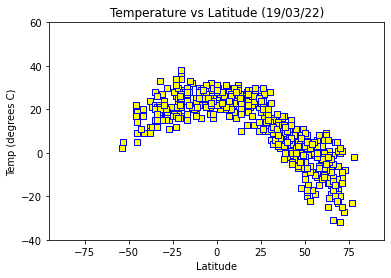

In [16]:
# Establish list of x and y values for the scatter plot.

x_values = Hum_MasterFrame_df['Latitude'].astype(int)
y_values = Hum_MasterFrame_df["Temp"].astype(int)

plt.scatter(x_values, y_values, marker="s", facecolors="yellow", edgecolors="blue")

plt.title(f"Temperature vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Temp (degrees C)')
plt.xlim(-95, 95)
plt.ylim(-40, 60)

# Optional Linear Regression Model:

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# regress_values
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_values, regress_values,"g-")
# plt.annotate(line_eq,(-75, -20),fontsize=11,color="red")
# print("For Linear Regression Line:")
# print("(y is the Temperature and x is the Latitude.)")

plt.savefig("TempVLatitude.png", facecolor="w", bbox_inches="tight")

plt.show()


## Latitude vs. Humidity Plot

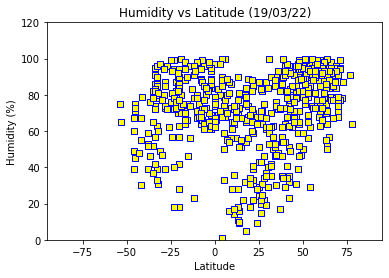

In [17]:
# Establish a new list of y values for the scatter plot.

y_values = Hum_MasterFrame_df["Humidity"].astype(int)

plt.scatter(x_values, y_values, marker="s", facecolors="yellow", edgecolors="blue")

plt.title(f"Humidity vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-95, 95)
plt.ylim(0, 120)

# Optional Linear Regression Model:

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# regress_values
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_values, regress_values,"g-")
# plt.annotate(line_eq,(15, 15),fontsize=11,color="red")
# print("For Linear Regression Line:")
# print("(y is the Humidity and x is the Latitude.)")

plt.savefig("HumVLatitude.png", facecolor="w", bbox_inches="tight")
plt.show()


## Latitude vs. Cloudiness Plot

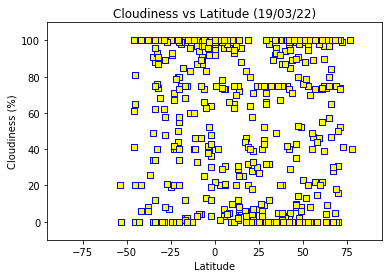

In [18]:
# Establish a new list of y values for the scatter plot.

y_values = Hum_MasterFrame_df['Cloudiness'].astype(int)

plt.scatter(x_values, y_values, marker="s", facecolors="yellow", edgecolors="blue")

plt.title(f"Cloudiness vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-95, 95)
plt.ylim(-10, 110)

# Optional Linear Regression Model:

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# regress_values
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print("For Linear Regression Line:")
# print("(y is the Cloudiness and x is the Latitude.)")
# plt.plot(x_values, regress_values,"g-")
# plt.annotate(line_eq,(10,75),fontsize=11,color="red")

plt.savefig("CloudVLatitude.png", facecolor="w", bbox_inches="tight")
plt.show()


## Latitude vs. Wind Speed Plot

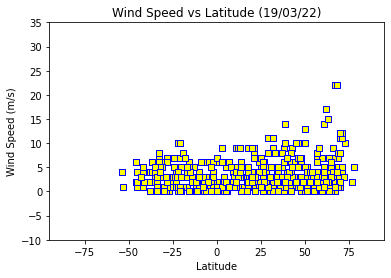

In [19]:
y_values = Hum_MasterFrame_df["Wind Speed"].astype(int)

plt.scatter(x_values, y_values, marker="s", facecolors="yellow", edgecolors="blue")

plt.title(f"Wind Speed vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.xlim(-95, 95)
plt.ylim(-10, 35)

# Optional Linear Regression Model:

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# regress_values
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print("For Linear Regression Line:")
# print("(y is the Wind Speed and x is the Latitude.)")
# plt.plot(x_values, regress_values,"g-")
# plt.annotate(line_eq,(10,75),fontsize=11,color="red")

plt.savefig("WindSVLatitude.png", facecolor="w", bbox_inches="tight")
plt.show()


## Linear Regression

In [20]:
# Divide the master data frame into two. One for Southern Hemisphere cities and the other for Northern.

Northern_df=Hum_MasterFrame_df.loc[Hum_MasterFrame_df["Longitude"]>=0, :]
Southern_df=Hum_MasterFrame_df.loc[Hum_MasterFrame_df["Longitude"]<0, :]
Northern_df

,City Name,City ID,Country Code,Longitude,Latitude,Temp,Feels Like Temp,Min Temp,Max Temp,Pressure,Humidity,Visibility,Wind Speed,Wind Temp,Sunrise,Sunset,Cloudiness
2,Longyearbyen,2729907,SJ,15.6401,78.2186,-2.09,-7.92,-2.09,-2.09,991,64,10000,5.66,180,1647666022,1647709810,40
3,Voh,2137748,NC,164.7,-20.9667,25.95,25.95,25.95,25.95,1005,87,10000,0.79,288,1647630267,1647674033,100
4,Phibun Mangsahan,1607730,TH,105.2291,15.2447,26.1,26.1,24.99,28.39,1009,51,10000,1.31,5,1647644658,1647688181,96
5,Cape Town,3369157,ZA,18.4232,-33.9258,18.33,18.39,17.93,18.95,1016,83,10000,3.6,230,1647665312,1647709185,0
6,Dudinka,1507116,RU,86.1778,69.4058,-6.32,-13.32,-6.32,-6.32,1001,95,341,7,291,1647649252,1647692729,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Plettenberg Bay,964712,ZA,23.3716,-34.0527,18.65,18.45,18.65,18.65,1019,72,10000,0.73,319,1647664123,1647707999,100
573,Dera Ghazi Khan,1180289,PK,70.6348,30.0561,28.44,27.38,28.44,28.44,1005,29,10000,3.72,39,1647652981,1647696460,0
574,Badou,2367660,TG,0.6,7.5833,24.36,25.18,24.36,24.36,1008,89,10000,1.69,164,1647669743,1647713308,4
577,Ushtobe,1517637,KZ,77.9838,45.2514,0.09,-2.9,0.09,0.09,1033,65,10000,2.48,275,1647651234,1647694680,100


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6013315652026382


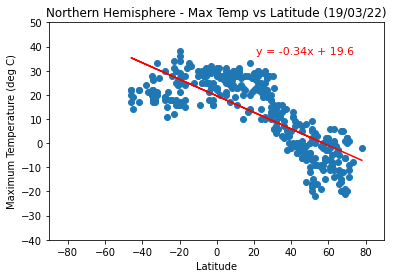

For Linear Regression Line:
(y is the Maximum Temperature and x is the Latitude.)


In [21]:
# Establish list of x and y values for the scatter plot.

x_values = Northern_df["Latitude"].astype(int)
y_values = Northern_df["Max Temp"].astype(int)

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (deg C)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-40, 50)
plt.show()
print("For Linear Regression Line:")
print("(y is the Maximum Temperature and x is the Latitude.)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4490252316590264


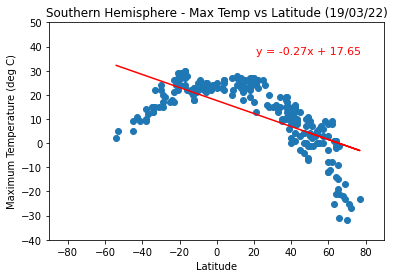

For Linear Regression Line:
(y is the Maximum Temperature and x is the Latitude.)


In [22]:
# Establish list of x and y values for the scatter plot.

x_values = Southern_df["Latitude"].astype(int)
y_values = Southern_df["Max Temp"].astype(int)

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (deg C)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-40, 50)
plt.show()
print("For Linear Regression Line:")
print("(y is the Maximum Temperature and x is the Latitude.)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.029093942384906573


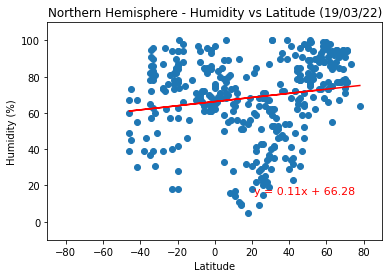

For Linear Regression Line:
(y is the Humidity and x is the Latitude.)


In [23]:
# Establish list of x and y values for the scatter plot.

x_values = Northern_df["Latitude"].astype(int)
y_values = Northern_df["Humidity"].astype(int)

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,15),fontsize=11,color="red")
plt.title(f"Northern Hemisphere - Humidity vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.show()
print("For Linear Regression Line:")
print("(y is the Humidity and x is the Latitude.)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009995462714571912


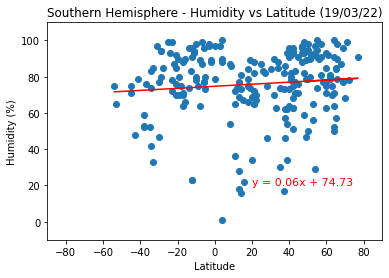

For Linear Regression Line:
(y is the Humidity and x is the Latitude.)


In [31]:
# Establish list of x and y values for the scatter plot.

x_values = Southern_df["Latitude"].astype(int)
y_values = Southern_df["Humidity"].astype(int)

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=11,color="red")
plt.title(f"Southern Hemisphere - Humidity vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.show()
print("For Linear Regression Line:")
print("(y is the Humidity and x is the Latitude.)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 6.111393729317938e-08


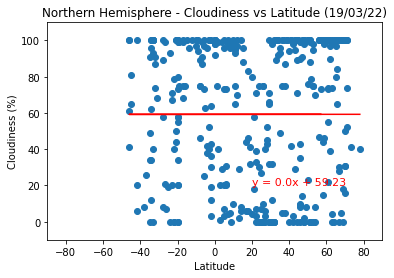

For Linear Regression Line:
(y is the Cloudiness and x is the Latitude.)


In [25]:
# Establish list of x and y values for the scatter plot.

x_values = Northern_df["Latitude"].astype(int)
y_values = Northern_df["Cloudiness"].astype(int)

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=11,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.show()
print("For Linear Regression Line:")
print("(y is the Cloudiness and x is the Latitude.)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02925961750273255


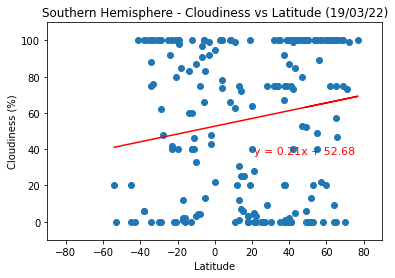

For Linear Regression Line:
(y is the Cloudiness and x is the Latitude.)


In [26]:
# Establish list of x and y values for the scatter plot.

x_values = Southern_df["Latitude"].astype(int)
y_values = Southern_df["Cloudiness"].astype(int)

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,37),fontsize=11,color="red")
plt.title(f"Southern Hemisphere - Cloudiness vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.show()
print("For Linear Regression Line:")
print("(y is the Cloudiness and x is the Latitude.)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:
# Convert wind speeds from m/s to miles/hour to match the question.

Wspeed_metric_N=Northern_df["Wind Speed"]
Wspeed_imperial_N=[x*2.23694 for x in Wspeed_metric_N]


The r-squared is: 0.03411405098857283


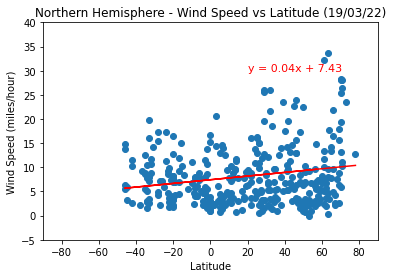

For Linear Regression Line:
(y is the Wind Speed and x is the Latitude.)


In [28]:
# Establish list of x and y values for the scatter plot.

x_values = Northern_df["Latitude"].astype(int)
y_values = Wspeed_imperial_N

# Establish a linear regression model:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=11,color="red")
plt.title(f"Northern Hemisphere - Wind Speed vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles/hour)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-5, 40)
plt.show()
print("For Linear Regression Line:")
print("(y is the Wind Speed and x is the Latitude.)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [29]:
Wspeed_metric_S=Southern_df["Wind Speed"]
Wspeed_imperial_S=[x*2.23694 for x in Wspeed_metric_S]

The r-squared is: 0.00020785790019053473


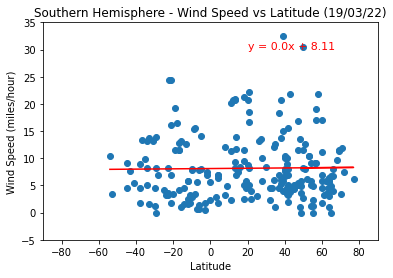

For Linear Regression Line:
(y is the Wind Speed and x is the Latitude.)


In [30]:
x_values = Southern_df["Latitude"].astype(int)
y_values = Wspeed_imperial_S
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=11,color="red")
plt.title(f"Southern Hemisphere - Wind Speed vs Latitude ({date_of_request})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles/hour)')
print(f"The r-squared is: {rvalue**2}")
plt.xlim(-90, 90)
plt.ylim(-5, 35)
plt.show()
print("For Linear Regression Line:")
print("(y is the Wind Speed and x is the Latitude.)")